<a href="https://colab.research.google.com/github/loyoladesa/qoeprediction/blob/main/jan_2025/Constru%C3%A7%C3%A3oGrafoCausalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criação de Grafo de Causalidade RNP - QoE

## Preparação

### Constantes

Salva os resultados e datasets na pasta exp_final


In [1]:
radical = '/content/drive/MyDrive/Seagate/RNP/dataset_'

mes = 'nov'
ano = '2024'
exp = 'exp_final'

# Datasets de entrada
dataset_rnp = 'dataset_rnp_metricas.csv'
dataset_qoe = 'dataset_qoe_medias.csv'

# Datasets de saída
dataset_rnp_causalidade = 'dataset_rnp_qoe_causalidade.csv'
mapeamento_causalidade = 'mapeamento_causalidade.csv'
grafo_causalidade = 'grafo_causalidade.gexf'
grafo_causalidade_2 = 'grafo_causalidade_stage2.gexf'
grafo_causalidade_3 = 'grafo_causalidade_stage3.gexf'
dataset_transposto = 'dataset_trasnposto.csv'


pre_path = radical + mes + '_' + ano

# Caminhos de entrada

path_dataset_rnp = pre_path + '/dataset/' + dataset_rnp
path_dataset_qoe = pre_path + '/dataset/' + dataset_qoe

# Caminhos de saída

path_dataset_rnp_causalidade = pre_path + '/dataset/' + exp + '/' + dataset_rnp_causalidade
path_mapeamento_causalidade = pre_path + '/dataset/' + exp + '/' + mapeamento_causalidade
path_grafo_causalidade = pre_path + '/dataset/' + exp + '/' + grafo_causalidade
path_grafo_causalidade_2 = pre_path + '/dataset/' + exp + '/' + grafo_causalidade_2
path_grafo_causalidade_3 = pre_path + '/dataset/' + exp + '/' + grafo_causalidade_3

path_dataset_transposto = pre_path + '/dataset/' + exp + '/' + dataset_transposto

### Bibliotecas

In [2]:
#libraries for data manipulation
import numpy as np
import pandas as pd
import json
import networkx as nx

### Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregamento de Dados

dataset com as métricas da rnp


In [ ]:
dataset = pd.read_csv(path_dataset_rnp)
dataset

,TimeStamp,RTT_min_ac_rj,RTT_avg_ac_rj,RTT_max_ac_rj,RTT_min_go_rj,RTT_avg_go_rj,RTT_max_go_rj,RTT_min_mt_rj,RTT_avg_mt_rj,RTT_max_mt_rj,...,packet-reorders-bidir_mt_rj,packet-reorders-bidir_pb_rj,packet-reorders-bidir_pe_rj,packet-reorders-bidir_rn_rj,throughput_ac_rj,throughput_go_rj,throughput_mt_rj,throughput_pb_rj,throughput_pe_rj,throughput_rn_rj
0,2024-06-27 20:35:00,58.50000,59.65,62.80000,26.000000,26.81,28.300000,38.000000,38.25,38.500000,...,0.0,0.0,0.0,0.0,9.137277e+08,9.898588e+08,6.549918e+08,9.179959e+08,7.280313e+09,9.413572e+08
1,2024-06-27 20:40:00,58.60000,59.00,59.40000,26.000000,26.32,26.700000,38.000000,38.35,39.100000,...,0.0,0.0,0.0,0.0,8.428584e+08,9.890506e+08,6.542907e+08,8.692440e+08,7.938165e+09,8.642002e+08
2,2024-06-27 21:00:00,58.60000,88.45,319.00000,26.000000,26.32,26.700000,37.900000,38.15,38.400000,...,0.0,0.0,0.0,0.0,8.787225e+08,9.884111e+08,4.436426e+08,9.029306e+08,7.866883e+09,9.309242e+08
3,2024-06-27 21:20:00,58.50000,74.28,159.00000,26.000000,26.47,26.900000,37.900000,40.81,52.900000,...,0.0,0.0,0.0,0.0,8.877570e+08,9.113525e+08,4.942291e+08,9.119116e+08,6.560996e+09,9.121605e+08
4,2024-06-27 21:25:00,58.50000,74.69,200.00000,26.000000,30.14,65.300000,38.000000,42.49,63.500000,...,0.0,0.0,0.0,0.0,8.323362e+08,9.901548e+08,5.881468e+08,8.921503e+08,6.667752e+09,9.121605e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57119,2024-11-22 19:10:00,60.17839,0.00,84.52201,27.927452,0.00,39.860955,42.642382,0.00,56.248685,...,0.0,0.0,0.0,0.0,8.923036e+08,8.521389e+08,5.189625e+08,8.757416e+08,2.986442e+09,9.121605e+08
57120,2024-11-22 19:15:00,60.17839,0.00,84.52201,27.927452,0.00,39.860955,42.642382,0.00,56.248685,...,0.0,0.0,0.0,0.0,8.923036e+08,8.521389e+08,5.189625e+08,8.757416e+08,2.986442e+09,9.121605e+08
57121,2024-11-22 19:20:00,60.17839,0.00,84.52201,27.927452,0.00,39.860955,42.642382,0.00,56.248685,...,0.0,0.0,0.0,0.0,8.923036e+08,8.521389e+08,5.189625e+08,8.757416e+08,2.986442e+09,9.121605e+08
57122,2024-11-22 19:30:00,60.17839,0.00,84.52201,27.927452,0.00,39.860955,42.642382,0.00,56.248685,...,0.0,0.0,0.0,0.0,8.923036e+08,8.521389e+08,5.189625e+08,8.757416e+08,2.986442e+09,9.121605e+08


In [ ]:
df_qoe = pd.read_csv(path_dataset_qoe)
df_qoe

,qoe_value
0,2.889076
1,2.871409
2,2.869708
3,2.926384
4,2.849752
...,...
2557,2.753287
2558,2.779358
2559,2.787759
2560,2.753287


## Causalidade

### Transfer Entropy

In [ ]:
from collections import Counter

def calculate_joint_probability(data, states):
    """
    Calcula a probabilidade conjunta normalizada para um conjunto de estados.
    """
    counts = Counter(data)
    total = sum(counts.values())
    probabilities = {key: value / total for key, value in counts.items()}
    return probabilities

def transfer_entropy(X, Y, k, l):
    """
    Calcula a Transfer Entropy (TE) de X para Y.

    Parâmetros:
    - X: Série temporal de onde a informação será transferida.
    - Y: Série temporal para onde a informação será transferida.
    - k: Dimensão de embedding para a série Y (histórico de Y).
    - l: Dimensão de embedding para a série X (histórico de X).

    Retorna:
    - TE: Transfer Entropy de X para Y.
    """
    # Garantir que os inputs sejam numpy arrays
    X = np.array(X)
    Y = np.array(Y)

    # Criar estados de embedding
    data_points = []
    for t in range(max(k, l), len(Y) - 1):
        y_future = Y[t + 1]       # Valor futuro de Y
        y_past = tuple(Y[t - k + 1:t + 1])  # Histórico de Y (tamanho k)
        x_past = tuple(X[t - l + 1:t + 1])  # Histórico de X (tamanho l)
        data_points.append((y_future, y_past, x_past))

    # Extrair probabilidades conjuntas
    P_yf_yp_xp = calculate_joint_probability([(y[0], y[1], y[2]) for y in data_points], data_points)
    P_yf_yp = calculate_joint_probability([(y[0], y[1]) for y in data_points], data_points)
    P_yf_yp_xp_conditional = calculate_joint_probability([(y[0], y[1], y[2]) for y in data_points], data_points)

    # Cálculo da TE
    TE = 0
    for (y_future, y_past, x_past), p_joint in P_yf_yp_xp.items():
        p_cond_yf_yp_xp = p_joint / P_yf_yp[(y_future, y_past)]
        p_cond_yf_yp = P_yf_yp[(y_future, y_past)]

        # Evitar logaritmos de 0
        if p_cond_yf_yp_xp > 0 and p_cond_yf_yp > 0:
            TE += p_joint * np.log2(p_cond_yf_yp_xp / p_cond_yf_yp)

    return TE

### Método de Causalidade

In [ ]:
def calcularCausalidadeTE(a,b):
  k = 2
  l = 2
  te_xy = transfer_entropy(a, b,k,l)
  #te_yx = transfer_entropy(b,a,k,l)
  if (te_xy == 0):
    return False
  #if (te_yx == 0):
   # return False
  #causalidade = te_xy / te_yx
  print(f"Causalidade: {te_xy}")
  #if (causalidade >= 1):
  if (te_xy >= 1):
      return True
  return False

### Teste de Causalidade

In [ ]:
def teste_causalidade(lista_X,lista_Y,inverso):
  causalidade = 'Não Existe Causalidade!'
  mensagem  = "Causalidade X,Y"
  if inverso :
    mensagem  = "Causalidade Y,X"

  print(mensagem)
  print()
  existeCausalidade = calcularCausalidadeTE(lista_X,lista_Y)
  if (existeCausalidade):
    causalidade = 'Existe Causalidade!'
  print(causalidade)
  print()

## Construção do Grafo

### pré-processamento

In [ ]:
dataset.dropna

<bound method DataFrame.dropna of                  TimeStamp  RTT_min_ac_rj  RTT_avg_ac_rj  RTT_max_ac_rj  \
0      2024-06-27 20:35:00       58.50000          59.65       62.80000   
1      2024-06-27 20:40:00       58.60000          59.00       59.40000   
2      2024-06-27 21:00:00       58.60000          88.45      319.00000   
3      2024-06-27 21:20:00       58.50000          74.28      159.00000   
4      2024-06-27 21:25:00       58.50000          74.69      200.00000   
...                    ...            ...            ...            ...   
57119  2024-11-22 19:10:00       60.17839           0.00       84.52201   
57120  2024-11-22 19:15:00       60.17839           0.00       84.52201   
57121  2024-11-22 19:20:00       60.17839           0.00       84.52201   
57122  2024-11-22 19:30:00       60.17839           0.00       84.52201   
57123  2024-11-22 19:35:00       60.17839           0.00       84.52201   

       RTT_min_go_rj  RTT_avg_go_rj  RTT_max_go_rj  RTT_min_mt_rj  \
0          26.000000          26.81      28.300000      38.000000   
1          26.000000          26.32      26.700000      38.000000   
2          26.000000          26.32      26.700000      37.900000   
3          26.000000          26.47      26.900000      37.900000   
4          26.000000          30.14      65.300000      38.000000   
...              ...            ...            ...            ...   
57119      27.927452           0.00      39.860955      42.642382   
57120      27.927452           0.00      39.860955      42.642382   
57121      27.927452           0.00      39.860955      42.642382   
57122      27.927452           0.00      39.860955      42.642382   
57123      27.927452           0.00      39.860955      42.642382   

       RTT_avg_mt_rj  RTT_max_mt_rj  ...  packet-reorders-bidir_mt_rj  \
0              38.25      38.500000  ...                          0.0   
1              38.35      39.100000  ...                          0.0   
2              38.15      38.400000  ...                          0.0   
3              40.81      52.900000  ...                          0.0   
4              42.49      63.500000  ...                          0.0   
...              ...            ...  ...                          ...   
57119           0.00      56.248685  ...                          0.0   
57120           0.00      56.248685  ...                          0.0   
57121           0.00      56.248685  ...                          0.0   
57122           0.00      56.248685  ...                          0.0   
57123           0.00      56.248685  ...                          0.0   

       packet-reorders-bidir_pb_rj  packet-reorders-bidir_pe_rj  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...                          ...   
57119                          0.0                          0.0   
57120                          0.0                          0.0   
57121                          0.0                          0.0   
57122                          0.0                          0.0   
57123                          0.0                          0.0   

       packet-reorders-bidir_rn_rj  throughput_ac_rj  throughput_go_rj  \
0                              0.0      9.137277e+08      9.898588e+08   
1                              0.0      8.428584e+08      9.890506e+08   
2                              0.0      8.787225e+08      9.884111e+08   
3                              0.0      8.877570e+08      9.113525e+08   
4                              0.0      8.323362e+08      9.901548e+08   
...                            ...               ...               ...   
57119                          0.0  

In [ ]:
alvo = df_qoe[['qoe_value']]
alvo

,qoe_value
0,2.889076
1,2.871409
2,2.869708
3,2.926384
4,2.849752
...,...
2557,2.753287
2558,2.779358
2559,2.787759
2560,2.753287


In [ ]:
alvo.dropna

<bound method DataFrame.dropna of       qoe_value
0      2.889076
1      2.871409
2      2.869708
3      2.926384
4      2.849752
...         ...
2557   2.753287
2558   2.779358
2559   2.787759
2560   2.753287
2561   2.815131

[2562 rows x 1 columns]>

In [ ]:
colunas = dataset.columns
print(len(colunas))

43


In [ ]:
dataset.drop(columns=['TimeStamp'], inplace=True)

In [ ]:
dataset

,RTT_min_ac_rj,RTT_avg_ac_rj,RTT_max_ac_rj,RTT_min_go_rj,RTT_avg_go_rj,RTT_max_go_rj,RTT_min_mt_rj,RTT_avg_mt_rj,RTT_max_mt_rj,RTT_min_pb_rj,...,packet-reorders-bidir_mt_rj,packet-reorders-bidir_pb_rj,packet-reorders-bidir_pe_rj,packet-reorders-bidir_rn_rj,throughput_ac_rj,throughput_go_rj,throughput_mt_rj,throughput_pb_rj,throughput_pe_rj,throughput_rn_rj
0,58.50000,59.65,62.80000,26.000000,26.81,28.300000,38.000000,38.25,38.500000,28.300000,...,0.0,0.0,0.0,0.0,9.137277e+08,9.898588e+08,6.549918e+08,9.179959e+08,7.280313e+09,9.413572e+08
1,58.60000,59.00,59.40000,26.000000,26.32,26.700000,38.000000,38.35,39.100000,28.300000,...,0.0,0.0,0.0,0.0,8.428584e+08,9.890506e+08,6.542907e+08,8.692440e+08,7.938165e+09,8.642002e+08
2,58.60000,88.45,319.00000,26.000000,26.32,26.700000,37.900000,38.15,38.400000,28.300000,...,0.0,0.0,0.0,0.0,8.787225e+08,9.884111e+08,4.436426e+08,9.029306e+08,7.866883e+09,9.309242e+08
3,58.50000,74.28,159.00000,26.000000,26.47,26.900000,37.900000,40.81,52.900000,28.300000,...,0.0,0.0,0.0,0.0,8.877570e+08,9.113525e+08,4.942291e+08,9.119116e+08,6.560996e+09,9.121605e+08
4,58.50000,74.69,200.00000,26.000000,30.14,65.300000,38.000000,42.49,63.500000,28.200000,...,0.0,0.0,0.0,0.0,8.323362e+08,9.901548e+08,5.881468e+08,8.921503e+08,6.667752e+09,9.121605e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57119,60.17839,0.00,84.52201,27.927452,0.00,39.860955,42.642382,0.00,56.248685,38.005767,...,0.0,0.0,0.0,0.0,8.923036e+08,8.521389e+08,5.189625e+08,8.757416e+08,2.986442e+09,9.121605e+08
57120,60.17839,0.00,84.52201,27.927452,0.00,39.860955,42.642382,0.00,56.248685,38.005767,...,0.0,0.0,0.0,0.0,8.923036e+08,8.521389e+08,5.189625e+08,8.757416e+08,2.986442e+09,9.121605e+08
57121,60.17839,0.00,84.52201,27.927452,0.00,39.860955,42.642382,0.00,56.248685,38.005767,...,0.0,0.0,0.0,0.0,8.923036e+08,8.521389e+08,5.189625e+08,8.757416e+08,2.986442e+09,9.121605e+08
57122,60.17839,0.00,84.52201,27.927452,0.00,39.860955,42.642382,0.00,56.248685,38.005767,...,0.0,0.0,0.0,0.0,8.923036e+08,8.521389e+08,5.189625e+08,8.757416e+08,2.986442e+09,9.121605e+08


In [ ]:
#Criação do Array a ser percorrido com as métricas da RNP
S = []
for coluna in colunas:
  if (coluna != 'TimeStamp'):
    S.append(dataset[[coluna]])
print(f'Tamanho do Array: {len(S)}')

Tamanho do Array: 42


### Mapeamento Colunas - Dataset Causalidade

In [ ]:
def mapeamento_colunas(dataset_colunas):
  colunas = dataset_colunas
  print(colunas)
  mapeamento_id_metrica = {}
  cont = 0
  id = []
  for col in colunas:
    mapeamento_id_metrica[cont]=col
    id.append(cont)
    cont = cont + 1
  return mapeamento_id_metrica,id

In [ ]:
dataset_colunas = dataset.columns

In [ ]:
mapeamento_id_metrica,id = mapeamento_colunas(dataset_colunas)

Index(['RTT_min_ac_rj', 'RTT_avg_ac_rj', 'RTT_max_ac_rj', 'RTT_min_go_rj',
       'RTT_avg_go_rj', 'RTT_max_go_rj', 'RTT_min_mt_rj', 'RTT_avg_mt_rj',
       'RTT_max_mt_rj', 'RTT_min_pb_rj', 'RTT_avg_pb_rj', 'RTT_max_pb_rj',
       'RTT_min_pe_rj', 'RTT_avg_pe_rj', 'RTT_max_pe_rj', 'RTT_min_rn_rj',
       'RTT_avg_rn_rj', 'RTT_max_rn_rj', 'packet-count-lost-bidir_ac_rj',
       'packet-count-lost-bidir_go_rj', 'packet-count-lost-bidir_mt_rj',
       'packet-count-lost-bidir_pb_rj', 'packet-count-lost-bidir_pe_rj',
       'packet-count-lost-bidir_rn_rj', 'packet-loss-rate-bidir_ac_rj',
       'packet-loss-rate-bidir_go_rj', 'packet-loss-rate-bidir_mt_rj',
       'packet-loss-rate-bidir_pb_rj', 'packet-loss-rate-bidir_pe_rj',
       'packet-loss-rate-bidir_rn_rj', 'packet-reorders-bidir_ac_rj',
       'packet-reorders-bidir_go_rj', 'packet-reorders-bidir_mt_rj',
       'packet-reorders-bidir_pb_rj', 'packet-reorders-bidir_pe_rj',
       'packet-reorders-bidir_rn_rj', 'throughput_ac_rj', 

In [ ]:
print(id)
print(mapeamento_id_metrica)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
{0: 'RTT_min_ac_rj', 1: 'RTT_avg_ac_rj', 2: 'RTT_max_ac_rj', 3: 'RTT_min_go_rj', 4: 'RTT_avg_go_rj', 5: 'RTT_max_go_rj', 6: 'RTT_min_mt_rj', 7: 'RTT_avg_mt_rj', 8: 'RTT_max_mt_rj', 9: 'RTT_min_pb_rj', 10: 'RTT_avg_pb_rj', 11: 'RTT_max_pb_rj', 12: 'RTT_min_pe_rj', 13: 'RTT_avg_pe_rj', 14: 'RTT_max_pe_rj', 15: 'RTT_min_rn_rj', 16: 'RTT_avg_rn_rj', 17: 'RTT_max_rn_rj', 18: 'packet-count-lost-bidir_ac_rj', 19: 'packet-count-lost-bidir_go_rj', 20: 'packet-count-lost-bidir_mt_rj', 21: 'packet-count-lost-bidir_pb_rj', 22: 'packet-count-lost-bidir_pe_rj', 23: 'packet-count-lost-bidir_rn_rj', 24: 'packet-loss-rate-bidir_ac_rj', 25: 'packet-loss-rate-bidir_go_rj', 26: 'packet-loss-rate-bidir_mt_rj', 27: 'packet-loss-rate-bidir_pb_rj', 28: 'packet-loss-rate-bidir_pe_rj', 29: 'packet-loss-rate-bidir_rn_rj', 30: 'packet-reorders-bidir_ac_rj',

#### Salvando Mapeamento Dataset Causalidade

In [ ]:
with open(path_mapeamento_causalidade, 'w') as arquivo:
    json.dump(mapeamento_id_metrica, arquivo)

#### Lendo Mapeamento Dataset Causalidade

In [ ]:
with open(path_mapeamento_causalidade, 'r') as arquivo:
    dicionario_carregado = json.load(arquivo)

#### Dicionario Carregado

In [ ]:
dicionario_carregado

{'0': 'RTT_min_ac_rj',
 '1': 'RTT_avg_ac_rj',
 '2': 'RTT_max_ac_rj',
 '3': 'RTT_min_go_rj',
 '4': 'RTT_avg_go_rj',
 '5': 'RTT_max_go_rj',
 '6': 'RTT_min_mt_rj',
 '7': 'RTT_avg_mt_rj',
 '8': 'RTT_max_mt_rj',
 '9': 'RTT_min_pb_rj',
 '10': 'RTT_avg_pb_rj',
 '11': 'RTT_max_pb_rj',
 '12': 'RTT_min_pe_rj',
 '13': 'RTT_avg_pe_rj',
 '14': 'RTT_max_pe_rj',
 '15': 'RTT_min_rn_rj',
 '16': 'RTT_avg_rn_rj',
 '17': 'RTT_max_rn_rj',
 '18': 'packet-count-lost-bidir_ac_rj',
 '19': 'packet-count-lost-bidir_go_rj',
 '20': 'packet-count-lost-bidir_mt_rj',
 '21': 'packet-count-lost-bidir_pb_rj',
 '22': 'packet-count-lost-bidir_pe_rj',
 '23': 'packet-count-lost-bidir_rn_rj',
 '24': 'packet-loss-rate-bidir_ac_rj',
 '25': 'packet-loss-rate-bidir_go_rj',
 '26': 'packet-loss-rate-bidir_mt_rj',
 '27': 'packet-loss-rate-bidir_pb_rj',
 '28': 'packet-loss-rate-bidir_pe_rj',
 '29': 'packet-loss-rate-bidir_rn_rj',
 '30': 'packet-reorders-bidir_ac_rj',
 '31': 'packet-reorders-bidir_go_rj',
 '32': 'packet-reorders-bidi

### Análise Série Temporal - QoE

In [ ]:
import matplotlib.pyplot as plt

def desenhar_grafico_serie_temporal(dataframe, coluna):
    """
    Extrai uma coluna de série temporal de um dataframe e desenha um gráfico.

    Args:
        dataframe (pd.DataFrame): O dataframe contendo a série temporal.
        coluna (str): O nome da coluna que representa a série temporal.
    """
    if coluna not in dataframe.columns:
        print(f"A coluna '{coluna}' não existe no dataframe.")
        return

    # Garantir que o índice do DataFrame seja do tipo datetime
    if not pd.api.types.is_datetime64_any_dtype(dataframe.index):
        print("O índice do DataFrame não está no formato datetime. Tentando converter...")
        try:
            dataframe.index = pd.to_datetime(dataframe.index)
        except Exception as e:
            print(f"Erro ao converter índice para datetime: {e}")
            return

    # Extração e plotagem da série temporal
    serie = dataframe[coluna]
    plt.figure(figsize=(10, 6))
    plt.plot(serie, label=coluna)
    plt.title(f"Série Temporal - {coluna}")
    plt.xlabel("Tempo")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

O índice do DataFrame não está no formato datetime. Tentando converter...


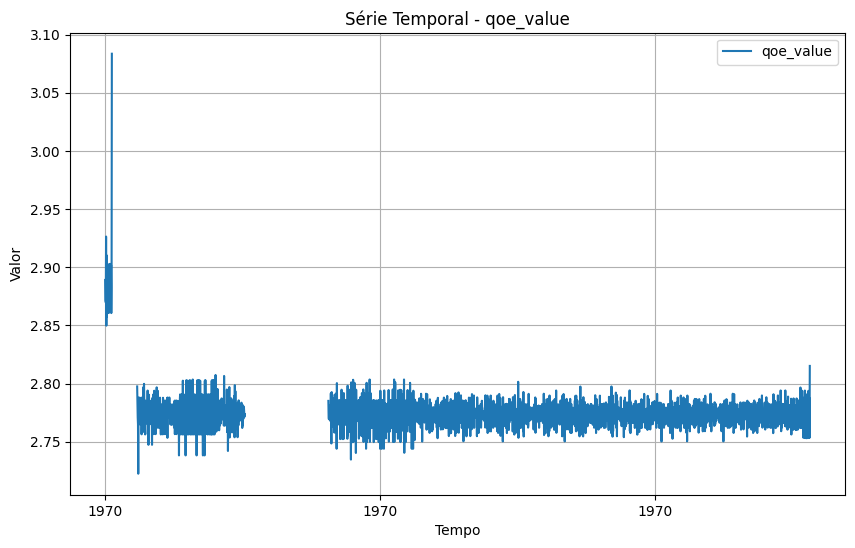

In [ ]:
desenhar_grafico_serie_temporal(df_qoe,'qoe_value')

In [ ]:
def preencher_valores_faltantes_dataframe(dataframe, coluna, metodo="linear"):
    """
    Preenche os valores faltantes (NaN) em uma coluna de um DataFrame usando interpolação.

    Args:
        dataframe (pd.DataFrame): DataFrame contendo a série temporal.
        coluna (str): Nome da coluna a ser preenchida.
        metodo (str): Método de interpolação (ex.: 'linear', 'time', 'polynomial').

    Returns:
        pd.DataFrame: DataFrame com a coluna preenchida.
    """
    if coluna not in dataframe.columns:
        raise ValueError(f"A coluna '{coluna}' não existe no DataFrame.")

    # Verificar se o índice é datetime para interpolação temporal, se necessário
    if metodo == "time" and not pd.api.types.is_datetime64_any_dtype(dataframe.index):
        raise ValueError("Para o método 'time', o índice do DataFrame deve ser datetime.")

    # Preencher valores NaN na coluna especificada
    dataframe[coluna] = dataframe[coluna].interpolate(method=metodo, limit_direction="forward")

    return dataframe

In [ ]:
df_preenchido = preencher_valores_faltantes_dataframe(df_qoe,'qoe_value')

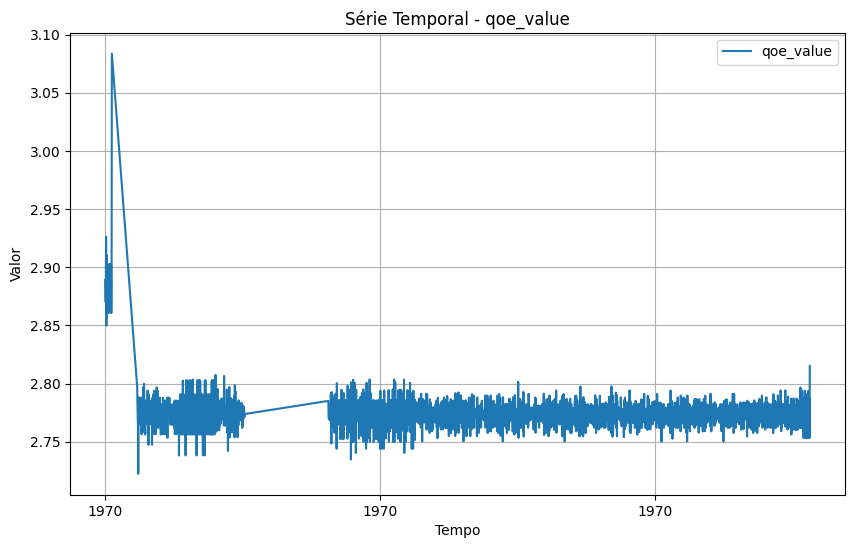

In [ ]:
desenhar_grafico_serie_temporal(df_preenchido,'qoe_value')

## Atualização do Alvo

In [ ]:
alvo = df_preenchido[['qoe_value']]
alvo.dropna

<bound method DataFrame.dropna of                                qoe_value
1970-01-01 00:00:00.000000000   2.889076
1970-01-01 00:00:00.000000001   2.871409
1970-01-01 00:00:00.000000002   2.869708
1970-01-01 00:00:00.000000003   2.926384
1970-01-01 00:00:00.000000004   2.849752
...                                  ...
1970-01-01 00:00:00.000002557   2.753287
1970-01-01 00:00:00.000002558   2.779358
1970-01-01 00:00:00.000002559   2.787759
1970-01-01 00:00:00.000002560   2.753287
1970-01-01 00:00:00.000002561   2.815131

[2562 rows x 1 columns]>

In [ ]:
alvo

,qoe_value
1970-01-01 00:00:00.000000000,2.889076
1970-01-01 00:00:00.000000001,2.871409
1970-01-01 00:00:00.000000002,2.869708
1970-01-01 00:00:00.000000003,2.926384
1970-01-01 00:00:00.000000004,2.849752
...,...
1970-01-01 00:00:00.000002557,2.753287
1970-01-01 00:00:00.000002558,2.779358
1970-01-01 00:00:00.000002559,2.787759
1970-01-01 00:00:00.000002560,2.753287


In [ ]:
lista_alvo = list(alvo['qoe_value'])
lista_alvo

[2.8890762801429584,
 2.8714089930691635,
 2.869707711285878,
 2.9263841205520307,
 2.849751568748327,
 2.9102505133707006,
 2.857174343721079,
 2.8889915296677016,
 2.889542750402477,
 2.901878239382893,
 2.860576940196581,
 2.8714089930691635,
 2.882593359677227,
 2.902516879053648,
 2.860886979530469,
 2.870930326473982,
 2.882593359677227,
 2.9028546955971835,
 2.9028546955971835,
 2.8694324881939397,
 2.882593359677227,
 2.901878239382893,
 2.860576940196581,
 2.882593359677227,
 3.083593873349434,
 3.0804840742589414,
 3.0773742751684487,
 3.074264476077956,
 3.0711546769874634,
 3.0680448778969707,
 3.064935078806478,
 3.0618252797159853,
 3.0587154806254926,
 3.055605681535,
 3.052495882444507,
 3.0493860833540145,
 3.046276284263522,
 3.043166485173029,
 3.0400566860825364,
 3.0369468869920437,
 3.0338370879015506,
 3.030727288811058,
 3.027617489720565,
 3.0245076906300725,
 3.02139789153958,
 3.018288092449087,
 3.0151782933585944,
 3.0120684942681017,
 3.008958695177609,
 3

### Funções de Grafos

#### Imprimir Nós e Arestas

In [4]:
def imprimirNósArestas(G):
  print("Nodes:", G.nodes())
  print("Length Nodes:", len(G.nodes()))
  print("Edges:", G.edges())
  print("Length Edges:", len(G.edges()))

#### Desenhar Grafo

In [5]:
def desenhar_grafo(G):
  import matplotlib.pyplot as plt
  import networkx as nx

  # Draw the graph
  plt.figure(figsize=(12, 8))  # Adjust figure size as needed
  pos = nx.spring_layout(G)  # You can try different layouts like 'circular', 'spectral',
  nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", width=1.5, edge_color="gray")
  plt.title("Grafo de Causalidade")
  plt.show()

#### Retirar Arestas

In [6]:
def retirar_arestas_alvo(graph, alvo):
  nodes = list(graph.nodes())
  print(nodes)
  n = len(nodes)
  for i in range(n):
    for j in range(n):
        if graph.has_edge(nodes[i], alvo):
          if graph.has_edge(nodes[j], alvo):
            if graph.has_edge(nodes[i], nodes[j]):
              graph.remove_edge(nodes[i],alvo)
              print(f"Aresta ({i}, C) removida.")
  return graph


## Construção do Grafo Causal

### Criação do Grafo

In [ ]:
import networkx as nx
G = nx.DiGraph()

n = len(S)
cont = 0

### Stage 1

In [ ]:


for i in range(n):
  for j in range(n):
    print("i =",i,"j = ",j)
    array = pd.DataFrame()
    array[0] = S[i]
    array[1] = S[j]
    array.dropna()
    if(i != j):
      existeCausalidade = calcularCausalidadeTE(list(array[0]),list(array[1]))
      if (existeCausalidade):
          G.add_edge(i, j)
      existeCausalidade = calcularCausalidadeTE(list(array[0]),list(alvo['qoe_value']))
      if (existeCausalidade):
          G.add_edge(i, 'C')
    if (j % 10 == 0):
      nx.write_gexf(G,path_grafo_causalidade)
nx.write_gexf(G,path_grafo_causalidade)

A saída de streaming foi truncada nas últimas 5000 linhas.
Causalidade: 11.080773647864476
i = 1 j =  18
Causalidade: 0.01736802528196062
Causalidade: 11.080773647864476
i = 1 j =  19
Causalidade: -0.7547963450361056
Causalidade: 11.080773647864476
i = 1 j =  20
Causalidade: -0.5509185561237806
Causalidade: 11.080773647864476
i = 1 j =  21
Causalidade: -0.8291085329918004
Causalidade: 11.080773647864476
i = 1 j =  22
Causalidade: -0.8632590643758427
Causalidade: 11.080773647864476
i = 1 j =  23
Causalidade: -0.8496417960385446
Causalidade: 11.080773647864476
i = 1 j =  24
Causalidade: -0.06394936509572038
Causalidade: 11.080773647864476
i = 1 j =  25
Causalidade: -0.34637946783522655
Causalidade: 11.080773647864476
i = 1 j =  26
Causalidade: -0.27089089363882235
Causalidade: 11.080773647864476
i = 1 j =  27
Causalidade: -0.34339011802633107
Causalidade: 11.080773647864476
i = 1 j =  28
Causalidade: -0.33950005640561365
Causalidade: 11.080773647864476
i = 1 j =  29
Causalidade: -0.34951

### Stage 2

#### Grafo Entrada (Stage 1)

In [ ]:
imprimirNósArestas(G)

Nodes: [0, 1, 'C', 2, 36, 3, 13, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41]
Length Nodes: 43
Edges: [(0, 1), (0, 'C'), (0, 2), (0, 36), (1, 'C'), (1, 2), (1, 36), (2, 'C'), (2, 1), (2, 36), (36, 'C'), (3, 'C'), (3, 1), (3, 2), (3, 13), (3, 36), (13, 'C'), (13, 1), (13, 2), (13, 36), (4, 'C'), (4, 1), (4, 2), (4, 13), (4, 36), (5, 'C'), (5, 1), (5, 2), (5, 13), (5, 36), (6, 'C'), (6, 1), (6, 2), (6, 13), (6, 36), (7, 'C'), (7, 1), (7, 2), (7, 13), (7, 36), (8, 'C'), (8, 1), (8, 2), (8, 13), (8, 36), (9, 'C'), (9, 1), (9, 2), (9, 13), (9, 36), (10, 'C'), (10, 1), (10, 2), (10, 13), (10, 36), (11, 'C'), (11, 1), (11, 2), (11, 13), (11, 36), (12, 'C'), (12, 1), (12, 2), (12, 13), (12, 36), (14, 'C'), (14, 1), (14, 2), (14, 13), (14, 36), (15, 'C'), (15, 1), (15, 2), (15, 13), (15, 36), (16, 'C'), (16, 1), (16, 2), (16, 13), (16, 36), (17, 'C'), (17, 1), (17, 2), (17, 13), (17, 36), (18, 'C'), (18

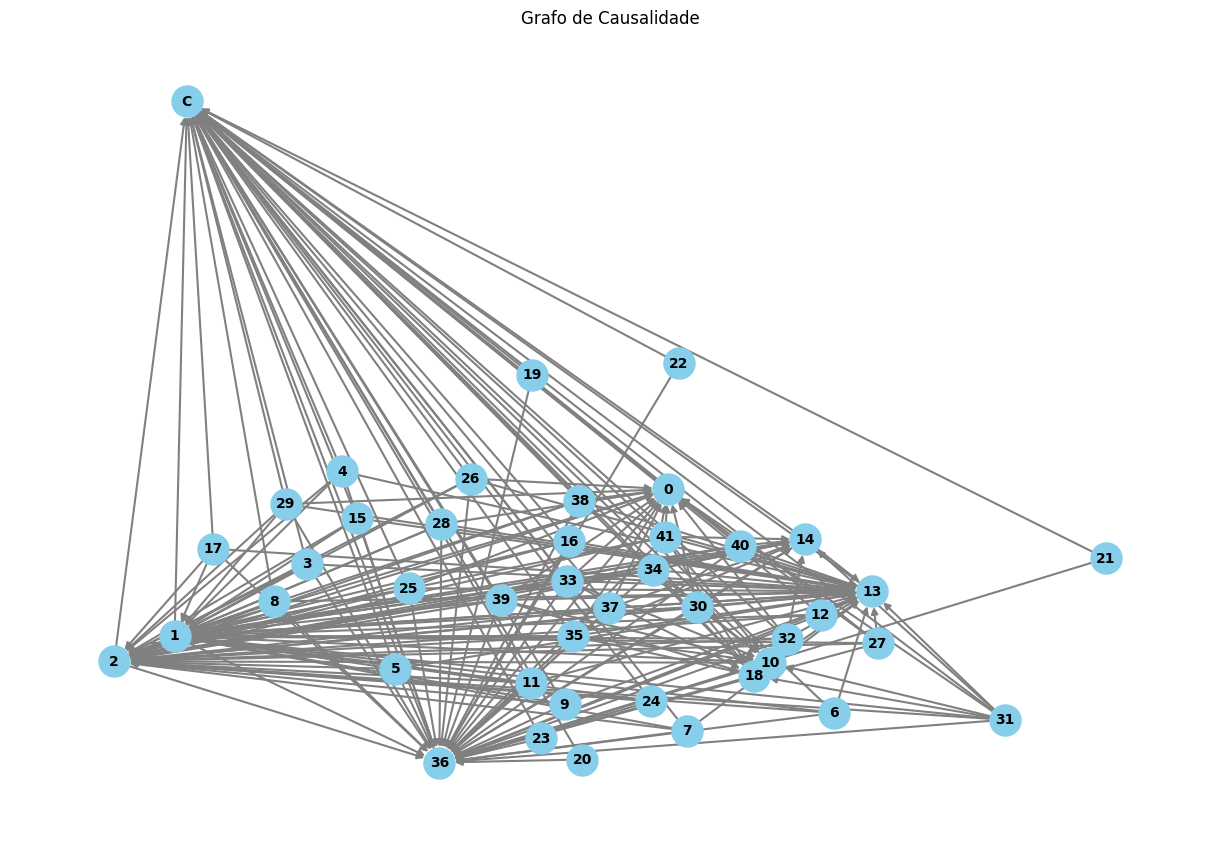

In [ ]:
desenhar_grafo(G)

#### Retirando Arestas

In [ ]:
G = retirar_arestas_alvo(G,'C')

[0, 1, 'C', 2, 36, 3, 13, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41]
Aresta (0, C) removida.
Aresta (1, C) removida.
Aresta (3, C) removida.
Aresta (5, C) removida.
Aresta (6, C) removida.
Aresta (7, C) removida.
Aresta (8, C) removida.
Aresta (9, C) removida.
Aresta (10, C) removida.
Aresta (11, C) removida.
Aresta (12, C) removida.
Aresta (13, C) removida.
Aresta (14, C) removida.
Aresta (15, C) removida.
Aresta (16, C) removida.
Aresta (17, C) removida.
Aresta (18, C) removida.
Aresta (19, C) removida.
Aresta (20, C) removida.
Aresta (21, C) removida.
Aresta (22, C) removida.
Aresta (23, C) removida.
Aresta (24, C) removida.
Aresta (25, C) removida.
Aresta (26, C) removida.
Aresta (27, C) removida.
Aresta (28, C) removida.
Aresta (29, C) removida.
Aresta (30, C) removida.
Aresta (31, C) removida.
Aresta (32, C) removida.
Aresta (33, C) removida.
Aresta (34, C) removida.
Aresta (35, C) remo

#### Grafo de Saída (Stage 2)

In [ ]:
imprimirNósArestas(G)

Nodes: [0, 1, 'C', 2, 36, 3, 13, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41]
Length Nodes: 43
Edges: [(0, 1), (0, 2), (0, 36), (1, 2), (1, 36), (2, 1), (2, 36), (36, 'C'), (3, 1), (3, 2), (3, 13), (3, 36), (13, 1), (13, 2), (13, 36), (4, 1), (4, 2), (4, 13), (4, 36), (5, 1), (5, 2), (5, 13), (5, 36), (6, 1), (6, 2), (6, 13), (6, 36), (7, 1), (7, 2), (7, 13), (7, 36), (8, 1), (8, 2), (8, 13), (8, 36), (9, 1), (9, 2), (9, 13), (9, 36), (10, 1), (10, 2), (10, 13), (10, 36), (11, 1), (11, 2), (11, 13), (11, 36), (12, 1), (12, 2), (12, 13), (12, 36), (14, 1), (14, 2), (14, 13), (14, 36), (15, 1), (15, 2), (15, 13), (15, 36), (16, 1), (16, 2), (16, 13), (16, 36), (17, 1), (17, 2), (17, 13), (17, 36), (18, 36), (19, 36), (20, 36), (21, 36), (22, 36), (23, 36), (24, 1), (24, 2), (24, 36), (25, 0), (25, 1), (25, 2), (25, 13), (25, 36), (26, 0), (26, 1), (26, 2), (26, 13), (26, 36), (27, 0), (27, 1), (2

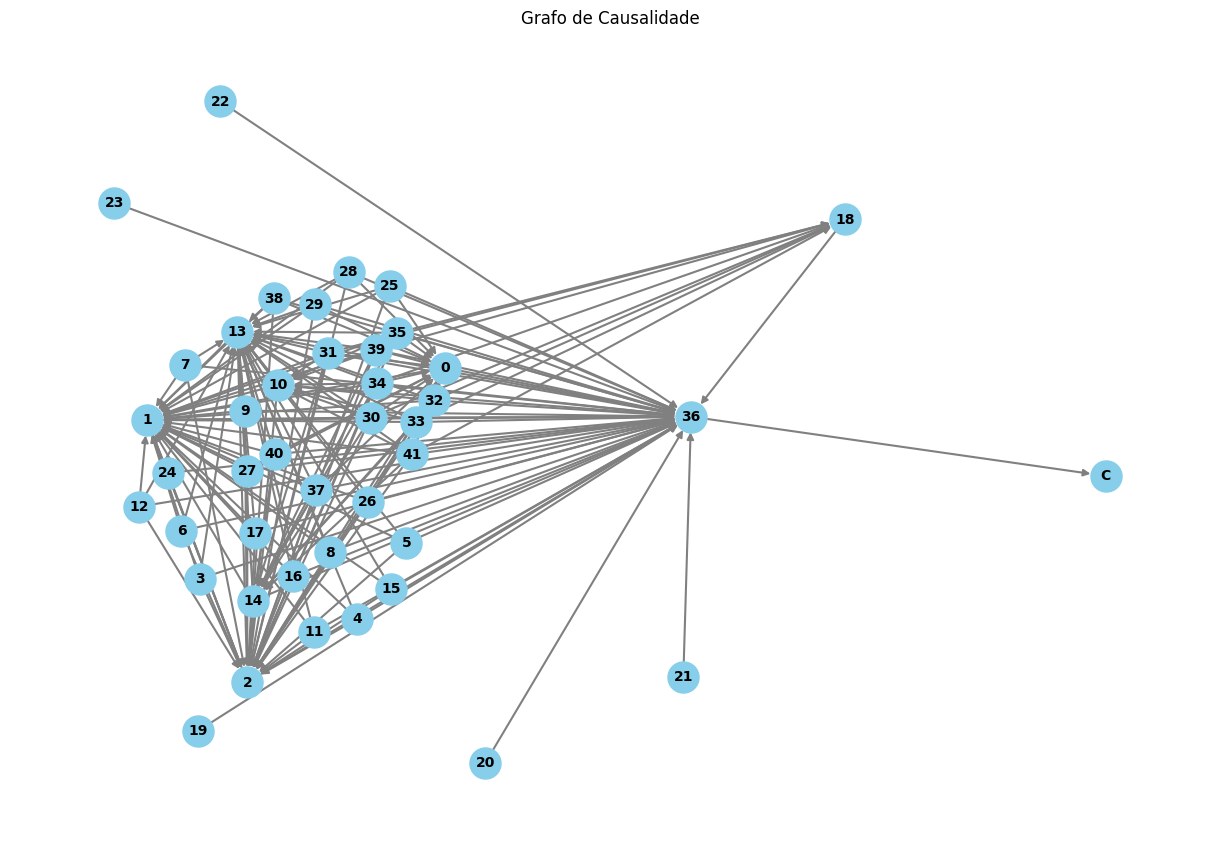

In [ ]:
desenhar_grafo(G)

In [ ]:
nx.write_gexf(G,path_grafo_causalidade_2)
print(f'Grafo Salvo em {path_grafo_causalidade_2}')

Grafo Salvo em /content/drive/MyDrive/Seagate/RNP/dataset_nov_2024/dataset/exp_final/grafo_causalidade_stage2.gexf


### Stage 3

In [9]:
# Assuming 'path_grafo_causalidade' is defined as in your provided code
G = nx.read_gexf(path_grafo_causalidade_2)

#### Grafo de Entrada (Stage 2)

Nodes: ['0', '1', 'C', '2', '36', '3', '13', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '37', '38', '39', '40', '41']
Length Nodes: 43
Edges: [('0', '1'), ('0', '2'), ('0', '36'), ('1', '2'), ('1', '36'), ('2', '1'), ('2', '36'), ('36', 'C'), ('3', '1'), ('3', '2'), ('3', '13'), ('3', '36'), ('13', '1'), ('13', '2'), ('13', '36'), ('4', '1'), ('4', '2'), ('4', '13'), ('4', '36'), ('5', '1'), ('5', '2'), ('5', '13'), ('5', '36'), ('6', '1'), ('6', '2'), ('6', '13'), ('6', '36'), ('7', '1'), ('7', '2'), ('7', '13'), ('7', '36'), ('8', '1'), ('8', '2'), ('8', '13'), ('8', '36'), ('9', '1'), ('9', '2'), ('9', '13'), ('9', '36'), ('10', '1'), ('10', '2'), ('10', '13'), ('10', '36'), ('11', '1'), ('11', '2'), ('11', '13'), ('11', '36'), ('12', '1'), ('12', '2'), ('12', '13'), ('12', '36'), ('14', '1'), ('14', '2'), ('14', '13'), ('14', '36'), ('15', '1'), (

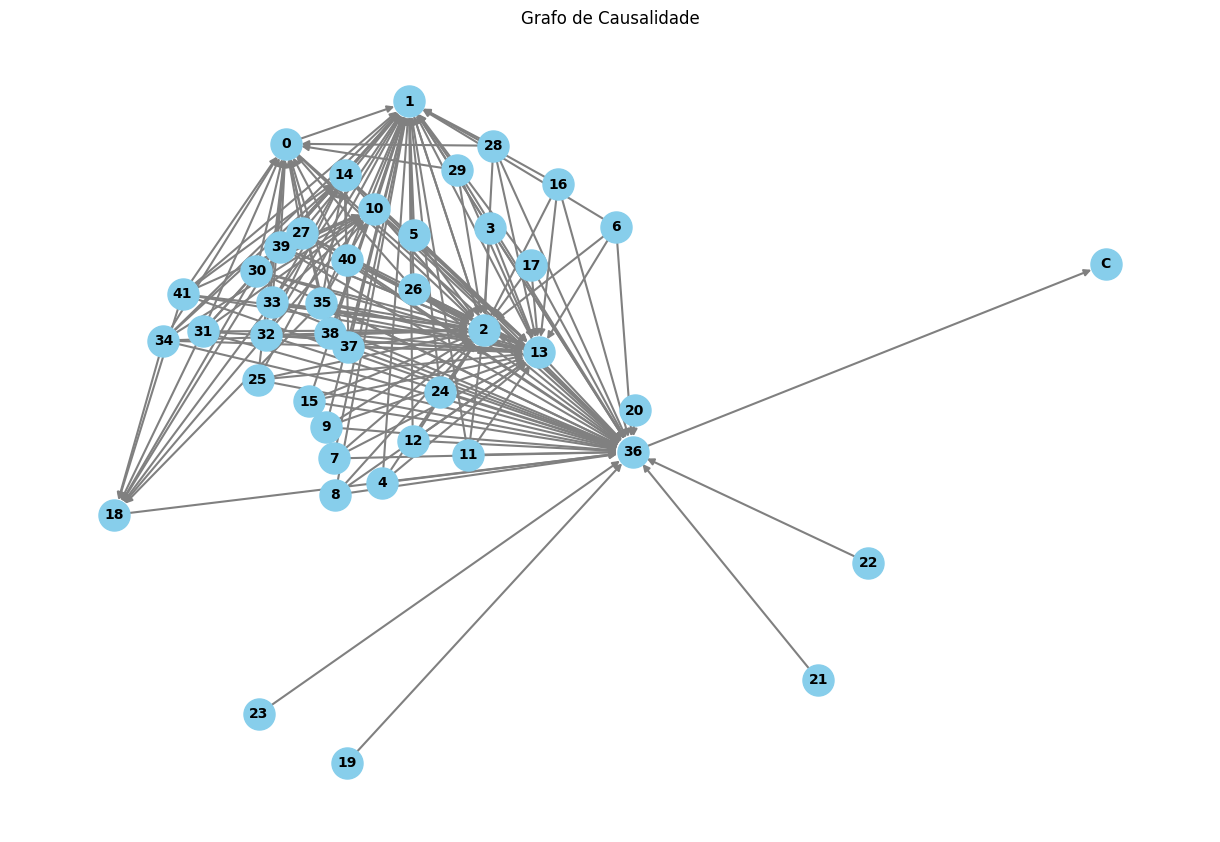

In [10]:
imprimirNósArestas(G)
desenhar_grafo(G)

In [11]:
caminhos = []
nodes = list(G.nodes())
for node in nodes:
  caminho = nx.shortest_path(G, source=node, target='C')
  print(f"Caminho node {node}: {caminho}")
  caminhos.append(caminho)

Caminho node 0: ['0', '36', 'C']
Caminho node 1: ['1', '36', 'C']
Caminho node C: ['C']
Caminho node 2: ['2', '36', 'C']
Caminho node 36: ['36', 'C']
Caminho node 3: ['3', '36', 'C']
Caminho node 13: ['13', '36', 'C']
Caminho node 4: ['4', '36', 'C']
Caminho node 5: ['5', '36', 'C']
Caminho node 6: ['6', '36', 'C']
Caminho node 7: ['7', '36', 'C']
Caminho node 8: ['8', '36', 'C']
Caminho node 9: ['9', '36', 'C']
Caminho node 10: ['10', '36', 'C']
Caminho node 11: ['11', '36', 'C']
Caminho node 12: ['12', '36', 'C']
Caminho node 14: ['14', '36', 'C']
Caminho node 15: ['15', '36', 'C']
Caminho node 16: ['16', '36', 'C']
Caminho node 17: ['17', '36', 'C']
Caminho node 18: ['18', '36', 'C']
Caminho node 19: ['19', '36', 'C']
Caminho node 20: ['20', '36', 'C']
Caminho node 21: ['21', '36', 'C']
Caminho node 22: ['22', '36', 'C']
Caminho node 23: ['23', '36', 'C']
Caminho node 24: ['24', '36', 'C']
Caminho node 25: ['25', '36', 'C']
Caminho node 26: ['26', '36', 'C']
Caminho node 27: ['27', 

In [12]:
def construir_grafo(caminhos):
    G = nx.Graph()  # Use nx.DiGraph() se o grafo for direcionado

    for caminho in caminhos:
        for i in range(len(caminho) - 1):
            G.add_edge(caminho[i], caminho[i+1])  # Adiciona arestas entre nós consecutivos

    return G

In [13]:
grafo_causal = construir_grafo(caminhos)

Nodes: ['0', '36', 'C', '1', '2', '3', '13', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '37', '38', '39', '40', '41']
Length Nodes: 43
Edges: [('0', '36'), ('36', 'C'), ('36', '1'), ('36', '2'), ('36', '3'), ('36', '13'), ('36', '4'), ('36', '5'), ('36', '6'), ('36', '7'), ('36', '8'), ('36', '9'), ('36', '10'), ('36', '11'), ('36', '12'), ('36', '14'), ('36', '15'), ('36', '16'), ('36', '17'), ('36', '18'), ('36', '19'), ('36', '20'), ('36', '21'), ('36', '22'), ('36', '23'), ('36', '24'), ('36', '25'), ('36', '26'), ('36', '27'), ('36', '28'), ('36', '29'), ('36', '30'), ('36', '31'), ('36', '32'), ('36', '33'), ('36', '34'), ('36', '35'), ('36', '37'), ('36', '38'), ('36', '39'), ('36', '40'), ('36', '41')]
Length Edges: 42


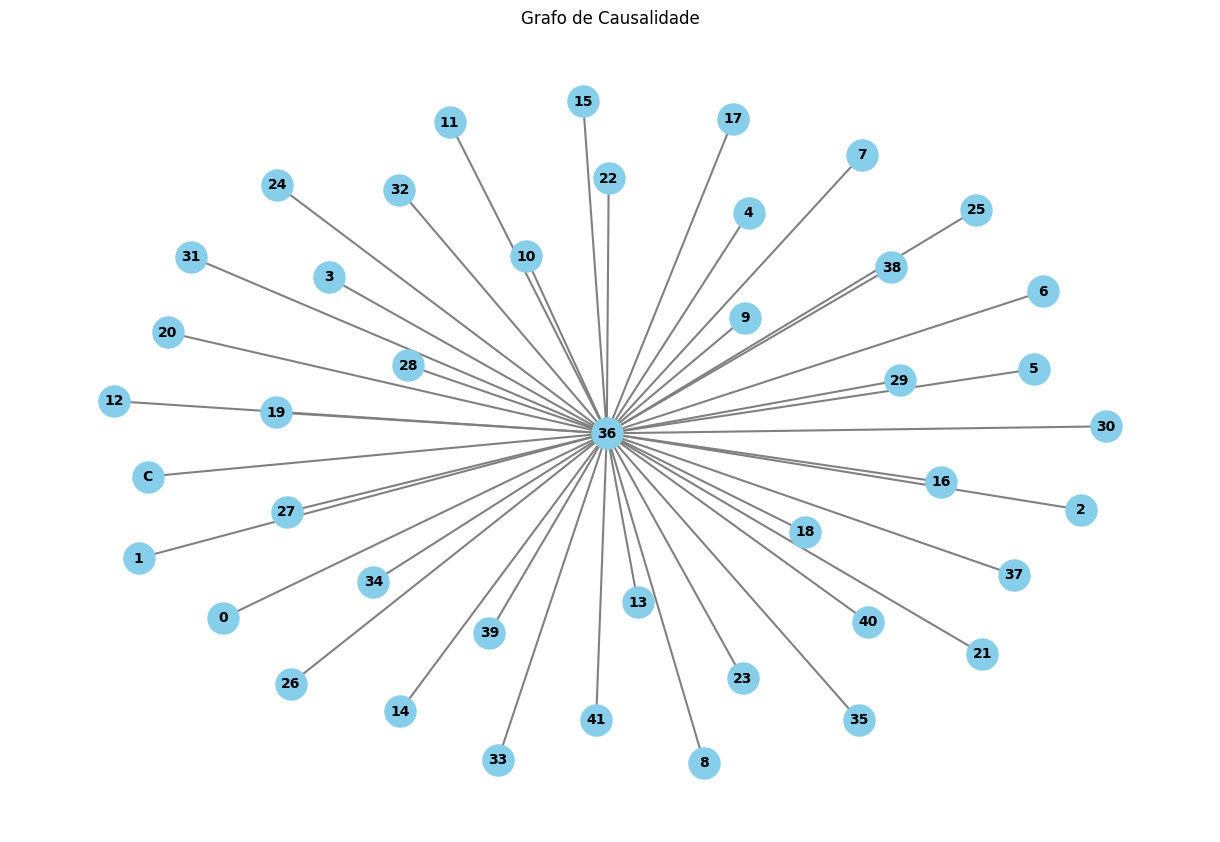

In [14]:
imprimirNósArestas(grafo_causal)
desenhar_grafo(grafo_causal)

In [15]:
nx.write_gexf(grafo_causal,path_grafo_causalidade_3)

In [16]:
# Assuming 'path_grafo_causalidade' is defined as in your provided code
G = nx.read_gexf(path_grafo_causalidade_3)

Nodes: ['0', '36', 'C', '1', '2', '3', '13', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '37', '38', '39', '40', '41']
Length Nodes: 43
Edges: [('0', '36'), ('36', 'C'), ('36', '1'), ('36', '2'), ('36', '3'), ('36', '13'), ('36', '4'), ('36', '5'), ('36', '6'), ('36', '7'), ('36', '8'), ('36', '9'), ('36', '10'), ('36', '11'), ('36', '12'), ('36', '14'), ('36', '15'), ('36', '16'), ('36', '17'), ('36', '18'), ('36', '19'), ('36', '20'), ('36', '21'), ('36', '22'), ('36', '23'), ('36', '24'), ('36', '25'), ('36', '26'), ('36', '27'), ('36', '28'), ('36', '29'), ('36', '30'), ('36', '31'), ('36', '32'), ('36', '33'), ('36', '34'), ('36', '35'), ('36', '37'), ('36', '38'), ('36', '39'), ('36', '40'), ('36', '41')]
Length Edges: 42


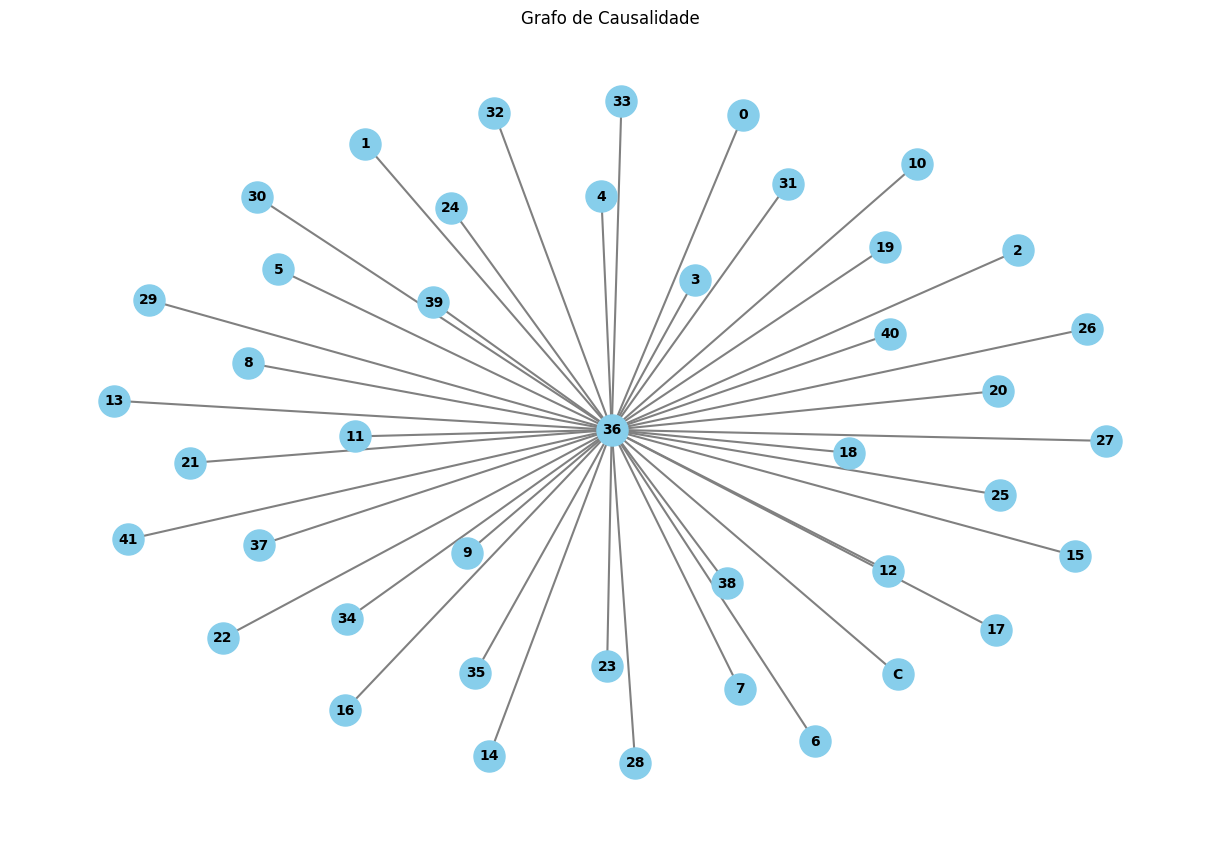

In [17]:
imprimirNósArestas(G)
desenhar_grafo(G)

## Dataset Transposto

In [ ]:
import networkx as nx

# Assuming 'path_grafo_causalidade' is defined as in your provided code
G = nx.read_gexf(path_grafo_causalidade_3)

In [ ]:
nodes= G.nodes()
edges = G.edges()

In [ ]:
dataset

,TimeStamp,RTT_min_ac_rj,RTT_avg_ac_rj,RTT_max_ac_rj,RTT_min_go_rj,RTT_avg_go_rj,RTT_max_go_rj,RTT_min_mt_rj,RTT_avg_mt_rj,RTT_max_mt_rj,...,packet-reorders-bidir_mt_rj,packet-reorders-bidir_pb_rj,packet-reorders-bidir_pe_rj,packet-reorders-bidir_rn_rj,throughput_ac_rj,throughput_go_rj,throughput_mt_rj,throughput_pb_rj,throughput_pe_rj,throughput_rn_rj
0,2024-06-27 20:35:00,58.50000,59.65,62.80000,26.000000,26.81,28.300000,38.000000,38.25,38.500000,...,0.0,0.0,0.0,0.0,9.137277e+08,9.898588e+08,6.549918e+08,9.179959e+08,7.280313e+09,9.413572e+08
1,2024-06-27 20:40:00,58.60000,59.00,59.40000,26.000000,26.32,26.700000,38.000000,38.35,39.100000,...,0.0,0.0,0.0,0.0,8.428584e+08,9.890506e+08,6.542907e+08,8.692440e+08,7.938165e+09,8.642002e+08
2,2024-06-27 21:00:00,58.60000,88.45,319.00000,26.000000,26.32,26.700000,37.900000,38.15,38.400000,...,0.0,0.0,0.0,0.0,8.787225e+08,9.884111e+08,4.436426e+08,9.029306e+08,7.866883e+09,9.309242e+08
3,2024-06-27 21:20:00,58.50000,74.28,159.00000,26.000000,26.47,26.900000,37.900000,40.81,52.900000,...,0.0,0.0,0.0,0.0,8.877570e+08,9.113525e+08,4.942291e+08,9.119116e+08,6.560996e+09,9.121605e+08
4,2024-06-27 21:25:00,58.50000,74.69,200.00000,26.000000,30.14,65.300000,38.000000,42.49,63.500000,...,0.0,0.0,0.0,0.0,8.323362e+08,9.901548e+08,5.881468e+08,8.921503e+08,6.667752e+09,9.121605e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57119,2024-11-22 19:10:00,60.17839,0.00,84.52201,27.927452,0.00,39.860955,42.642382,0.00,56.248685,...,0.0,0.0,0.0,0.0,8.923036e+08,8.521389e+08,5.189625e+08,8.757416e+08,2.986442e+09,9.121605e+08
57120,2024-11-22 19:15:00,60.17839,0.00,84.52201,27.927452,0.00,39.860955,42.642382,0.00,56.248685,...,0.0,0.0,0.0,0.0,8.923036e+08,8.521389e+08,5.189625e+08,8.757416e+08,2.986442e+09,9.121605e+08
57121,2024-11-22 19:20:00,60.17839,0.00,84.52201,27.927452,0.00,39.860955,42.642382,0.00,56.248685,...,0.0,0.0,0.0,0.0,8.923036e+08,8.521389e+08,5.189625e+08,8.757416e+08,2.986442e+09,9.121605e+08
57122,2024-11-22 19:30:00,60.17839,0.00,84.52201,27.927452,0.00,39.860955,42.642382,0.00,56.248685,...,0.0,0.0,0.0,0.0,8.923036e+08,8.521389e+08,5.189625e+08,8.757416e+08,2.986442e+09,9.121605e+08


In [ ]:
dicionario_carregado

{'0': 'RTT_min_ac_rj',
 '1': 'RTT_avg_ac_rj',
 '2': 'RTT_max_ac_rj',
 '3': 'RTT_min_go_rj',
 '4': 'RTT_avg_go_rj',
 '5': 'RTT_max_go_rj',
 '6': 'RTT_min_mt_rj',
 '7': 'RTT_avg_mt_rj',
 '8': 'RTT_max_mt_rj',
 '9': 'RTT_min_pb_rj',
 '10': 'RTT_avg_pb_rj',
 '11': 'RTT_max_pb_rj',
 '12': 'RTT_min_pe_rj',
 '13': 'RTT_avg_pe_rj',
 '14': 'RTT_max_pe_rj',
 '15': 'RTT_min_rn_rj',
 '16': 'RTT_avg_rn_rj',
 '17': 'RTT_max_rn_rj',
 '18': 'packet-count-lost-bidir_ac_rj',
 '19': 'packet-count-lost-bidir_go_rj',
 '20': 'packet-count-lost-bidir_mt_rj',
 '21': 'packet-count-lost-bidir_pb_rj',
 '22': 'packet-count-lost-bidir_pe_rj',
 '23': 'packet-count-lost-bidir_rn_rj',
 '24': 'packet-loss-rate-bidir_ac_rj',
 '25': 'packet-loss-rate-bidir_go_rj',
 '26': 'packet-loss-rate-bidir_mt_rj',
 '27': 'packet-loss-rate-bidir_pb_rj',
 '28': 'packet-loss-rate-bidir_pe_rj',
 '29': 'packet-loss-rate-bidir_rn_rj',
 '30': 'packet-reorders-bidir_ac_rj',
 '31': 'packet-reorders-bidir_go_rj',
 '32': 'packet-reorders-bidi

In [ ]:
alvo

,qoe_value
1970-01-01 00:00:00.000000000,2.889076
1970-01-01 00:00:00.000000001,2.871409
1970-01-01 00:00:00.000000002,2.869708
1970-01-01 00:00:00.000000003,2.926384
1970-01-01 00:00:00.000000004,2.849752
...,...
1970-01-01 00:00:00.000002557,2.753287
1970-01-01 00:00:00.000002558,2.779358
1970-01-01 00:00:00.000002559,2.787759
1970-01-01 00:00:00.000002560,2.753287


In [ ]:
dataset = dataset.T
dataset

,0,1,2,3,4,5,6,7,8,9,...,57114,57115,57116,57117,57118,57119,57120,57121,57122,57123
RTT_min_ac_rj,5.850000e+01,5.860000e+01,5.860000e+01,5.850000e+01,5.850000e+01,5.830000e+01,6.070000e+01,6.040000e+01,6.040000e+01,5.840000e+01,...,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01
RTT_avg_ac_rj,5.965000e+01,5.900000e+01,8.845000e+01,7.428000e+01,7.469000e+01,6.780000e+01,7.493000e+01,6.660000e+01,6.519000e+01,6.448000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
RTT_max_ac_rj,6.280000e+01,5.940000e+01,3.190000e+02,1.590000e+02,2.000000e+02,9.800000e+01,1.130000e+02,7.430000e+01,7.420000e+01,1.490000e+02,...,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01
RTT_min_go_rj,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.610000e+01,2.600000e+01,2.600000e+01,...,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01
RTT_avg_go_rj,2.681000e+01,2.632000e+01,2.632000e+01,2.647000e+01,3.014000e+01,2.648000e+01,4.257000e+01,2.658000e+01,4.857000e+01,2.664000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
RTT_max_go_rj,2.830000e+01,2.670000e+01,2.670000e+01,2.690000e+01,6.530000e+01,2.710000e+01,2.340000e+02,2.700000e+01,2.890000e+02,2.780000e+01,...,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01
RTT_min_mt_rj,3.800000e+01,3.800000e+01,3.790000e+01,3.790000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,...,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01
RTT_avg_mt_rj,3.825000e+01,3.835000e+01,3.815000e+01,4.081000e+01,4.249000e+01,3.848000e+01,7.044000e+01,3.908000e+01,3.929000e+01,3.925000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
RTT_max_mt_rj,3.850000e+01,3.910000e+01,3.840000e+01,5.290000e+01,6.350000e+01,3.920000e+01,6.210000e+02,4.220000e+01,4.160000e+01,4.560000e+01,...,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01
RTT_min_pb_rj,2.830000e+01,2.830000e+01,2.830000e+01,2.830000e+01,2.820000e+01,2.820000e+01,2.830000e+01,2.830000e+01,2.830000e+01,3.100000e+01,...,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01


In [ ]:
nomes_colunas = list(dicionario_carregado.keys())

In [ ]:
n = len(dataset)
print(n)

42


In [ ]:
id = []
for i in range(n):
  id.append(i)
print(id)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


In [ ]:
dataset.index = id

In [ ]:
indices = list(dataset.index)
print(indices)
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
['0', '1', 'C', '2', '36', '3', '13', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '37', '38', '39', '40', '41']


In [ ]:
no_serem_retirados = []
for no in indices:
  no = str(no)
  if(not(no in nodes)):
      #print("No = ",no)
      no_serem_retirados.append(int(no))

print("Nos retirados: ",no_serem_retirados)
print(len(no_serem_retirados))

Nos retirados:  []
0


In [ ]:
dataset.drop(no_serem_retirados,inplace=True)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,57114,57115,57116,57117,57118,57119,57120,57121,57122,57123
0,5.850000e+01,5.860000e+01,5.860000e+01,5.850000e+01,5.850000e+01,5.830000e+01,6.070000e+01,6.040000e+01,6.040000e+01,5.840000e+01,...,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01,6.017839e+01
1,5.965000e+01,5.900000e+01,8.845000e+01,7.428000e+01,7.469000e+01,6.780000e+01,7.493000e+01,6.660000e+01,6.519000e+01,6.448000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,6.280000e+01,5.940000e+01,3.190000e+02,1.590000e+02,2.000000e+02,9.800000e+01,1.130000e+02,7.430000e+01,7.420000e+01,1.490000e+02,...,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01,8.452201e+01
3,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.610000e+01,2.600000e+01,2.600000e+01,...,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01,2.792745e+01
4,2.681000e+01,2.632000e+01,2.632000e+01,2.647000e+01,3.014000e+01,2.648000e+01,4.257000e+01,2.658000e+01,4.857000e+01,2.664000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,2.830000e+01,2.670000e+01,2.670000e+01,2.690000e+01,6.530000e+01,2.710000e+01,2.340000e+02,2.700000e+01,2.890000e+02,2.780000e+01,...,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01,3.986096e+01
6,3.800000e+01,3.800000e+01,3.790000e+01,3.790000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,...,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01,4.264238e+01
7,3.825000e+01,3.835000e+01,3.815000e+01,4.081000e+01,4.249000e+01,3.848000e+01,7.044000e+01,3.908000e+01,3.929000e+01,3.925000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,3.850000e+01,3.910000e+01,3.840000e+01,5.290000e+01,6.350000e+01,3.920000e+01,6.210000e+02,4.220000e+01,4.160000e+01,4.560000e+01,...,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01,5.624869e+01
9,2.830000e+01,2.830000e+01,2.830000e+01,2.830000e+01,2.820000e+01,2.820000e+01,2.830000e+01,2.830000e+01,2.830000e+01,3.100000e+01,...,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01,3.800577e+01


In [ ]:
alvo = alvo.T

In [ ]:
alvo.index = [43]

In [ ]:
alvo

,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000007,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000009,...,1970-01-01 00:00:00.000002552,1970-01-01 00:00:00.000002553,1970-01-01 00:00:00.000002554,1970-01-01 00:00:00.000002555,1970-01-01 00:00:00.000002556,1970-01-01 00:00:00.000002557,1970-01-01 00:00:00.000002558,1970-01-01 00:00:00.000002559,1970-01-01 00:00:00.000002560,1970-01-01 00:00:00.000002561
43,2.889076,2.871409,2.869708,2.926384,2.849752,2.910251,2.857174,2.888992,2.889543,2.901878,...,2.785414,2.765036,2.776587,2.764771,2.793719,2.753287,2.779358,2.787759,2.753287,2.815131


In [ ]:
dataset = pd.concat([dataset, alvo], axis=0)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,1970-01-01 00:00:00.000002552,1970-01-01 00:00:00.000002553,1970-01-01 00:00:00.000002554,1970-01-01 00:00:00.000002555,1970-01-01 00:00:00.000002556,1970-01-01 00:00:00.000002557,1970-01-01 00:00:00.000002558,1970-01-01 00:00:00.000002559,1970-01-01 00:00:00.000002560,1970-01-01 00:00:00.000002561
0,5.850000e+01,5.860000e+01,5.860000e+01,5.850000e+01,5.850000e+01,5.830000e+01,6.070000e+01,6.040000e+01,6.040000e+01,5.840000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.965000e+01,5.900000e+01,8.845000e+01,7.428000e+01,7.469000e+01,6.780000e+01,7.493000e+01,6.660000e+01,6.519000e+01,6.448000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.280000e+01,5.940000e+01,3.190000e+02,1.590000e+02,2.000000e+02,9.800000e+01,1.130000e+02,7.430000e+01,7.420000e+01,1.490000e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.610000e+01,2.600000e+01,2.600000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.681000e+01,2.632000e+01,2.632000e+01,2.647000e+01,3.014000e+01,2.648000e+01,4.257000e+01,2.658000e+01,4.857000e+01,2.664000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.830000e+01,2.670000e+01,2.670000e+01,2.690000e+01,6.530000e+01,2.710000e+01,2.340000e+02,2.700000e+01,2.890000e+02,2.780000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.800000e+01,3.800000e+01,3.790000e+01,3.790000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.825000e+01,3.835000e+01,3.815000e+01,4.081000e+01,4.249000e+01,3.848000e+01,7.044000e+01,3.908000e+01,3.929000e+01,3.925000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3.850000e+01,3.910000e+01,3.840000e+01,5.290000e+01,6.350000e+01,3.920000e+01,6.210000e+02,4.220000e+01,4.160000e+01,4.560000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.830000e+01,2.830000e+01,2.830000e+01,2.830000e+01,2.820000e+01,2.820000e+01,2.830000e+01,2.830000e+01,2.830000e+01,3.100000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.to_csv(path_dataset_transposto,index=True)